# TODO

- Background Study

- EDA

- Develop Models

- Evaluate Models

- Develop web based front end

- Finalize latex report

## EDA Checklist:

- ReadData

- Dataset Description

- Pairplot

- outlier


1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184

# Dataset Description

**id** : Unique identifier for each data entry\
**name** : Name of the Pokémon\
**rank** : Rank or evolutionary stage\
**generation** : The generation in which the Pokémon was introduced\
**evolves_from** : Name of the Pokémon from which it evolves (if applicable)\
**type1** : Primary type of the Pokémon\
**type2** : Secondary type of the Pokémon (if it has one)\
**hp** : Base HP (Hit Points)\
**atk** : Base Attack stat\
**def** : Base Defense stat\
**spatk** : Base Special Attack stat\
**spdef** : Base Special Defense stat\
**speed** : Base Speed stat\
**total** : Total base stats\
**height** : Height of the Pokémon\
**weight** : Weight of the Pokémon\
**abilities** : List of the Pokémon's abilities\
**desc** : Description or characteristics of the Pokémon


In [17]:
import pandas as pd
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 

In [18]:
# Read the CSV file
df = pd.read_csv("./pokemons.csv")
pokemon_data = df.copy().drop(columns=['name', 'evolves_from', 'type1', 'type2', 'abilities', 'desc'])
pokemon_data

,id,rank,generation,hp,atk,def,spatk,spdef,speed,total,height,weight
0,1,ordinary,generation-i,45,49,49,65,65,45,318,7,69
1,2,ordinary,generation-i,60,62,63,80,80,60,405,10,130
2,3,ordinary,generation-i,80,82,83,100,100,80,525,20,1000
3,4,ordinary,generation-i,39,52,43,60,50,65,309,6,85
4,5,ordinary,generation-i,58,64,58,80,65,80,405,11,190
...,...,...,...,...,...,...,...,...,...,...,...,...
1012,1013,ordinary,generation-ix,71,60,106,121,80,70,508,2,22
1013,1014,legendary,generation-ix,88,128,115,58,86,80,555,18,922
1014,1015,legendary,generation-ix,88,75,66,130,90,106,555,10,122
1015,1016,legendary,generation-ix,88,91,82,70,125,99,555,14,301


### Data Cleaning

In [19]:
## replace all mythical pokemon rank with lengendary rank
pokemon_data = pokemon_data.replace("mythical", "legendary")

In [20]:
## check if there are any mythical ranks left in the dataframe
## nothing should show up
for i in pokemon_data['rank']:
    if i == "mythical":
        print(i)

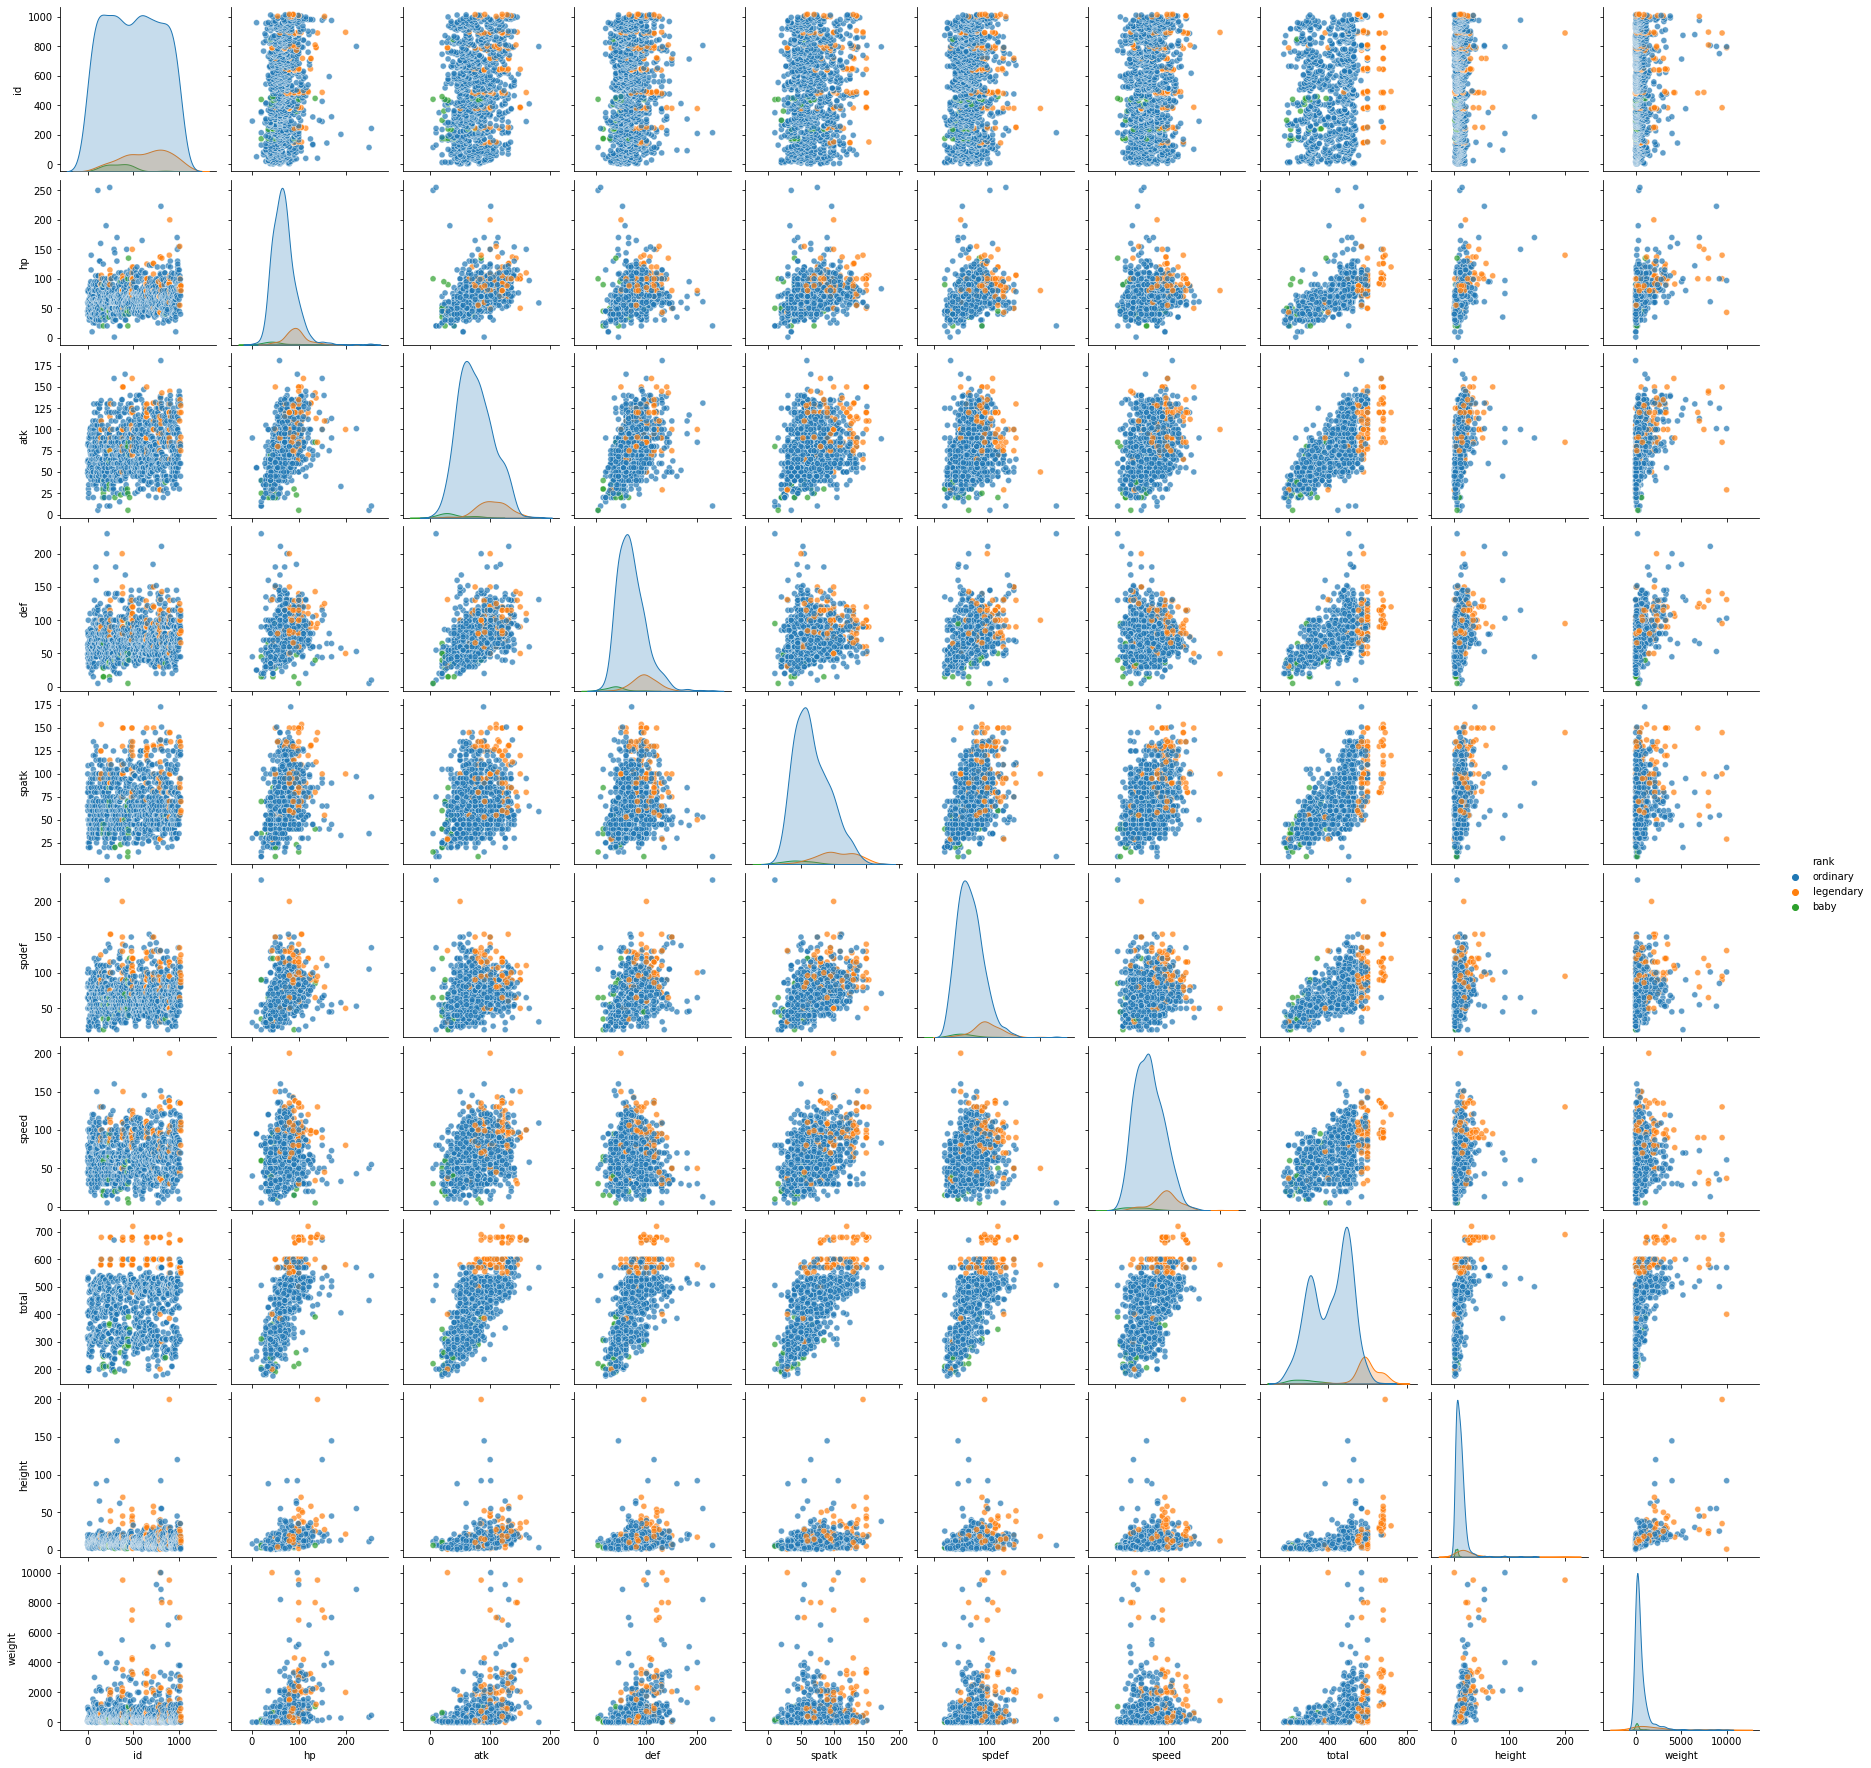

In [21]:
sns.pairplot(pokemon_data, hue='rank', diag_kind='kde', plot_kws={'alpha': 0.7})
plt.show()

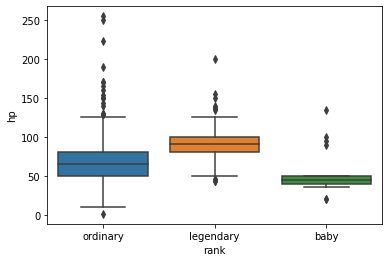

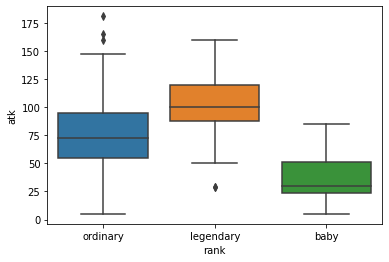

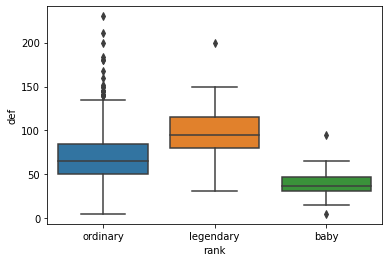

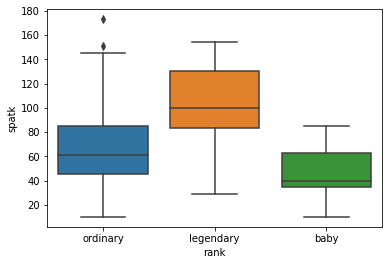

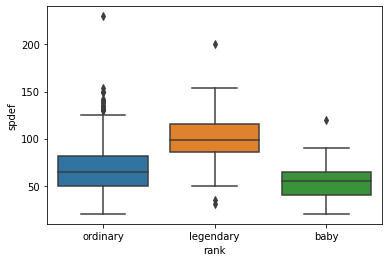

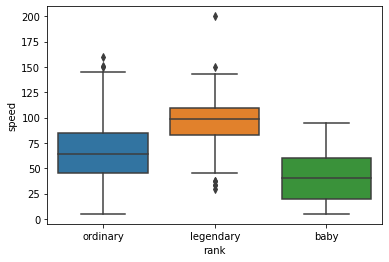

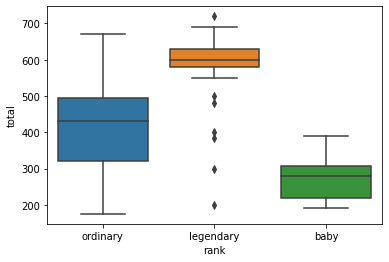

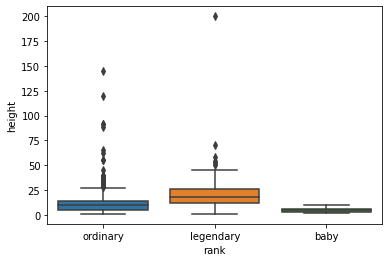

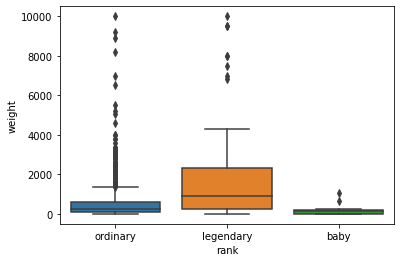

In [27]:
for col_names in pokemon_data.columns[3:]:
    sns.boxplot(x='rank',y=col_names, data=pokemon_data)
    plt.show()
    #print(col_names)